## Multi-class classification
Dataset: [Planet: Understanding the Amazon from Space](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space)

Objective:  To label satellite image chips with atmospheric conditions and various classes of land cover/land use.

Architecture: ResNet34

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *

In [4]:
PATH = 'data/planet/'

In [5]:
os.makedirs('data/planet/models', exist_ok=True)

In [6]:
ls{PATH}

__MACOSX/  test-jpg/             test_v2_file_mapping.csv  train-jpg/
models/    test-jpg-additional/  tmp/                      train_v2.csv


In [7]:
from fastai.plots import *

In [8]:
def get_lst(path): return glob(f'{path}/*.*')[0]

In [9]:
from planet import f2

In [10]:
metrics=[f2]
f_model = resnet34

In [11]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

### Data Augmentation

In [12]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

In [13]:
sz=64

In [14]:
data = get_data(sz)

In [15]:
data = data.resize(int(sz*1.3), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [16]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

*Finding learning rate*

In [18]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 11%|█▏        | 57/506 [00:04<00:33, 13.34it/s, loss=0.817]

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



KeyboardInterrupt: 

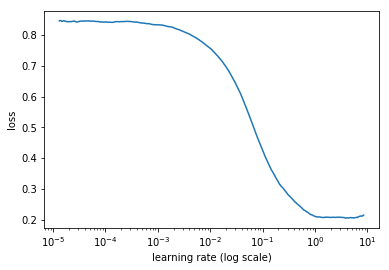

In [18]:
learn.sched.plot()

In [19]:
lr = 0.2

In [20]:
learn.fit(lr, 3, cycle_len=3, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=21), HTML(value='')))

[0.      0.14583 0.13464 0.87966]                            
[1.      0.13734 0.12964 0.88472]                            
[2.      0.1388  0.12934 0.88527]                            
[3.      0.13566 0.12893 0.88409]                            
[4.      0.13524 0.12615 0.8885 ]                            
[5.      0.13255 0.12624 0.88681]                            
[6.      0.12895 0.12397 0.88993]                            
[7.      0.12862 0.12287 0.89128]                            
[8.      0.12871 0.12291 0.89118]                            
[9.      0.13088 0.12623 0.8876 ]                            
[10.       0.12881  0.123    0.89101]                        
[11.       0.13079  0.12252  0.89206]                        
[12.       0.12654  0.12234  0.89132]                        
[13.       0.12551  0.12177  0.89371]                        
[14.       0.1248   0.12127  0.89283]                        
[15.       0.12301  0.12097  0.89311]                        
[16.    

In [20]:
lrs = np.array([lr/9, lr/3, lr])

In [1]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

NameError: name 'learn' is not defined

In [ ]:
learn.save(f'{sz}')
learn.sched.plot_loss()

In [21]:
sz=128

In [22]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.14293 0.12933 0.88786]                            
[1.      0.13498 0.12286 0.89376]                            
[2.      0.13088 0.1219  0.8949 ]                            
[3.      0.12935 0.1175  0.89919]                            
[4.      0.12806 0.11621 0.90065]                            
[5.      0.12554 0.1155  0.90053]                            
[6.      0.12486 0.11474 0.90168]                            



In [23]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.10413 0.09844 0.9182 ]                            
[1.      0.09916 0.0949  0.92123]                             
[2.      0.09751 0.09202 0.92239]                             
[3.      0.10017 0.09634 0.91757]                             
[4.      0.09677 0.09147 0.92406]                             
[5.      0.08976 0.08821 0.92659]                             
[6.      0.08475 0.08918 0.92595]                             



In [24]:
sz=256

In [25]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.09244 0.09381 0.92066]                             
[1.      0.09294 0.09285 0.92137]                             
[2.      0.09341 0.09281 0.92206]                             
[3.      0.09218 0.09251 0.92172]                             
[4.      0.09132 0.09171 0.92189]                             
[5.      0.09109 0.09078 0.92422]                             
[6.      0.0892  0.09051 0.92462]                             



In [26]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.09107 0.08673 0.92779]                             
[1.      0.0909  0.0873  0.92639]                             
[2.      0.08233 0.08464 0.92932]                             
[3.      0.08876 0.08685 0.92783]                             
[4.      0.08362 0.08575 0.92865]                             
[5.      0.0814  0.08467 0.92875]                             
[6.      0.08059 0.08544 0.9285 ]                             



In [27]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [28]:
f2(preds,y)

0.9303288557775402